Imported the following libraries:  
**Pandas**: Used to manipulate dataframe.  
**Numpy**: Used to manipulate arrays.  
**Matplot**: Used for visualization.  
**Seaborn**: Used for beautiful visualizations.

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

Imports dataset from a CSV file to a pandas dataframe.

In [375]:
df = pd.read_csv('data/movie_data.csv')

The following cell prints the top 5 rows. We can get familiar with the data the dataframe holds.

In [376]:
df.head()

,year,movie,worldwide,domestic,international,rated,genre,director,writer,critics,production
0,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",PG-13,"Action, Adventure, Drama, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus (screenplay by), Stephen Mc...",94%,Marvel Studios
1,2009,Avatar,"$2,788,701,337","$760,507,625","$2,028,193,712",PG-13,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,82%,20th Century Fox
2,1997,Titanic,"$2,208,208,395","$659,363,944","$1,548,844,451",PG-13,"Drama, Romance",James Cameron,James Cameron,89%,Paramount Pictures
3,2015,Star Wars Ep. VII: The Force Awakens,"$2,068,223,624","$936,662,225","$1,131,561,399",NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Avengers: Infinity War,"$2,048,359,754","$678,815,482","$1,369,544,272",PG-13,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus (screenplay by), Stephen Mc...",85%,Walt Disney Pictures


In the following cell we can see that all the data types are non-null objects except for the year column. Then we go ahead and check how many have 'NaN' values per column.

In [377]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
year             500 non-null int64
movie            500 non-null object
worldwide        500 non-null object
domestic         497 non-null object
international    500 non-null object
rated            441 non-null object
genre            444 non-null object
director         445 non-null object
writer           444 non-null object
critics          441 non-null object
production       389 non-null object
dtypes: int64(1), object(10)
memory usage: 43.1+ KB


year               0
movie              0
worldwide          0
domestic           3
international      0
rated             59
genre             56
director          55
writer            56
critics           59
production       111
dtype: int64

<h2> Cleaning </h2>
The following function takes a currency value such as $400,000,000 in the form of a string. It proceeds to remove the dollar sign and commas. Then, it turns them into a float, divides them 1 million, and rounds them to 2 decimal places. Finally, it returns the new value. This function is used later to transform box office revenue to the profer data type.

In [378]:
def changeToFloat(x):
    x = x.replace("$","").replace(",","")
    x = float(x)/1000000
    x = round(x,2)
    return x

We check which rows return 'NaN' using the critics column as a reference point. The 59 rows that show up are missing quite a bit of values.

In [379]:
df.loc[df.critics.isna() == True]

,year,movie,worldwide,domestic,international,rated,genre,director,writer,critics,production
3,2015,Star Wars Ep. VII: The Force Awakens,"$2,068,223,624","$936,662,225","$1,131,561,399",NaN,NaN,NaN,NaN,NaN,NaN
13,2017,Star Wars Ep. VIII: The Last Jedi,"$1,332,539,889","$620,181,382","$712,358,507",NaN,NaN,NaN,NaN,NaN,NaN
31,2019,Star Wars: The Rise of Skywalker,"$1,074,141,030","$515,202,542","$558,938,488",NaN,NaN,Steve Meyer,NaN,NaN,NaN
34,2006,Pirates of the Caribbean: Dead Manâs …,"$1,066,215,812","$423,315,812","$642,900,000",NaN,NaN,NaN,NaN,NaN,NaN
41,1999,Star Wars Ep. I: The Phantom Menace,"$1,027,044,677","$474,544,677","$552,500,000",NaN,NaN,NaN,NaN,NaN,NaN
48,2001,Harry Potter and the Sorcererâs Stone,"$975,047,606","$317,871,467","$657,176,139",NaN,NaN,NaN,NaN,NaN,NaN
50,2007,Pirates of the Caribbean: At Worldâs …,"$963,420,425","$309,420,425","$654,000,000",NaN,NaN,NaN,NaN,NaN,NaN
54,2014,The Hobbit: The Battle of the Five Ar…,"$945,577,621","$255,119,788","$690,457,833",NaN,NaN,NaN,NaN,NaN,NaN
55,2007,Harry Potter and the Order of the Pho…,"$943,076,457","$292,137,260","$650,939,197",NaN,NaN,NaN,NaN,NaN,NaN
76,2005,Star Wars Ep. III: Revenge of the Sith,"$848,998,877","$380,270,577","$468,728,300",NaN,NaN,NaN,NaN,NaN,NaN


A new variable is created as cleanDF. This new dataframe gets rid of rows that contain 'NaN' values based on the critics column. The reason why this was the best option is because each movie has very specific data, so it cannot be averaged or picked from the most common data that shows up.  

In [380]:
cleanDF = df.loc[df.critics.isna() != True]

The following block changes the worldwide, domestic, and international box office data to float numbers in millions. 

In [381]:
cleanDF.worldwide = cleanDF.worldwide.map(changeToFloat)
cleanDF.domestic = cleanDF.domestic.map(changeToFloat)
cleanDF.international = cleanDF.international.map(changeToFloat)

The following block takes the strings from genre, director, and writer and splits them using a comma as a deliminator. This returns a list in each cell. 

In [382]:
cleanDF.genre = cleanDF.genre.map(lambda x: x.split(','))
cleanDF.director = cleanDF.director.map(lambda x: x.split(','))
cleanDF.writer = cleanDF.writer.map(lambda x: x.split(','))

This line of code takes a string that reprensents a percentage, removes the percentage symbol, removes "/100", and divides them by 100 to scale them between 0 to 1. 

In [383]:
cleanDF.critics = cleanDF.critics.map(lambda x: float(x.replace('%','').replace("/100",""))/100)

<h1>Analysis</h1>
In this line of code, we are removing all entries that have a critics rating of less than .5. The reasoning behind this is that movies with higher rating will lead to higher customer loyatlty and satisfaction. 

In [384]:
cleanDF = cleanDF.loc[cleanDF.critics > .5]

The next line of code is just a visualization of worldwide box office revenue for the top x amount of rows. Using this visualization, it can be seen that most movies revenue less than 500 million, and the average worldwide revenue was 595 million. 

mean: 595.1437237237237


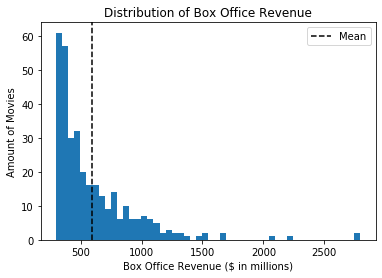

In [385]:
plt.hist(cleanDF.worldwide, bins=50)
plt.xlabel('Box Office Revenue ($ in millions)')
plt.ylabel('Amount of Movies')
plt.title('Distribution of Box Office Revenue')
plt.axvline(cleanDF.worldwide.mean(),linestyle='dashed',color='k',label='Mean')
plt.legend()
print('mean: {}'.format(cleanDF.worldwide.mean()))

For this analysis, a benchmark of at least 595 million was decided was appropriate because we want to take a look at movies that perform as average or above it. 

Text(0.5, 1.0, 'Distribution of Box Office Revenue')

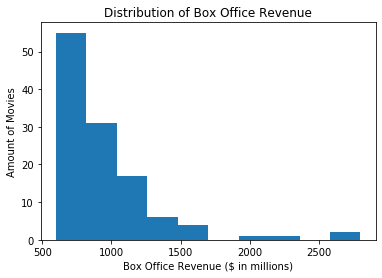

In [386]:
topDF = cleanDF.loc[cleanDF['worldwide'] >= 595]
plt.hist(topDF.worldwide)
plt.xlabel('Box Office Revenue ($ in millions)')
plt.ylabel('Amount of Movies')
plt.title('Distribution of Box Office Revenue')

Because the genre column on the dataframe contains list of the various genres a movie is classified, the following code creates a list, stored in g, that contains the genres for all the movies in the topDF dataframe. Then a visualization is created to see which genres are the most popular among the top 150 movies. 

In [387]:
g = []
for i in topDF.genre:
    g.extend(i)

Text(0.5, 1.0, 'Genre of Top 117 Movies')

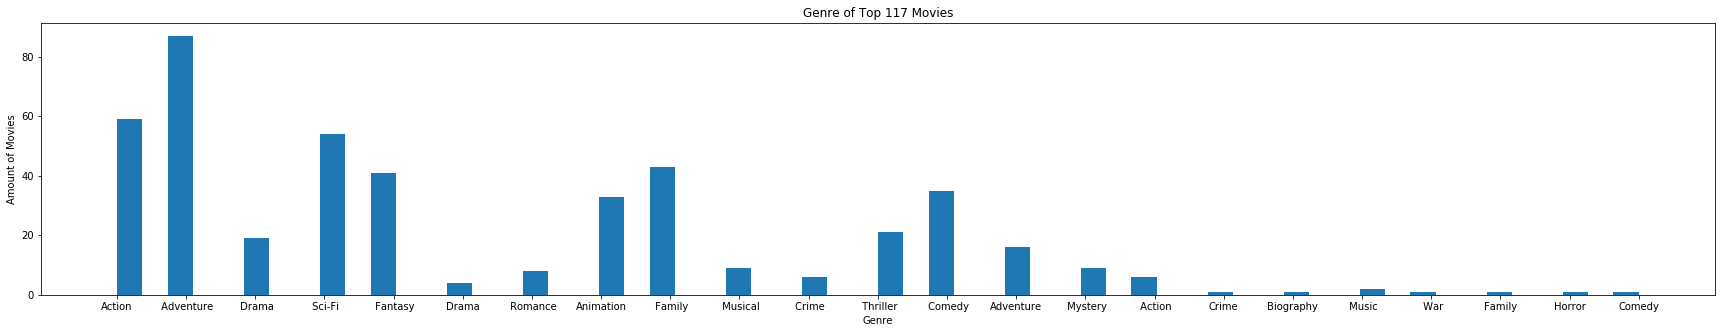

In [388]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
ax.hist(g,bins=60)
ax.set_xlabel('Genre')
ax.set_ylabel('Amount of Movies')
ax.set_title('Genre of Top {} Movies'.format(len(topDF.genre)))

Visualization of the rating for the top 150 movies.

Text(0.5, 1.0, 'Amount of Movies for Each Rating')

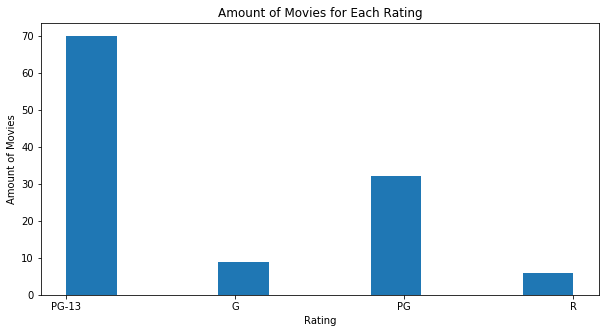

In [389]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(topDF.rated,bins=10)
ax.set_xlabel('Rating')
ax.set_ylabel('Amount of Movies')
ax.set_title('Amount of Movies for Each Rating')

The following block of code groups world, domestic, and international box office revenue by the rating of the movie and by year. Then, it returns the revenue of all the movies for each category.

In [390]:
pivotTable = topDF.loc[topDF.year > 2010]
pivotTable = pivotTable.groupby(['rated','year']).sum()
pivotTable.iloc[:,:3]

worldwide  domestic  international
rated year                                    
G     2013     743.59    268.49         475.10
      2017    1263.52    504.01         759.51
      2019    3781.29   1333.24        2448.07
PG    2011     664.84    165.25         499.59
      2012    1367.83    341.38        1026.45
      2013    2243.97    768.81        1475.16
      2014    2025.26    640.94        1384.31
      2015    2017.19    692.51        1324.69
      2016    5173.19   2079.04        3094.17
      2017    1834.70    474.35        1360.35
      2018    1242.81    608.58         634.22
      2019    1450.03    477.37         972.65
PG-13 2011    1971.85    591.22        1380.63
      2012    6817.09   2527.92        4289.17
      2013    5046.80   1863.40        3183.40
      2014    5086.52   1763.40        3323.12
      2015    6769.10   2174.51        4594.59
      2016    3699.78   1406.94        2292.84
      2017    5627.63   2081.90        3545.73
      2018    6065.91   2146.89        3919.01
      2019    6613.04   2166.52        4446.53
R     2016     785.03    363.07         421.95
      2017    1315.96    555.11         760.85
      2018     786.68    324.59         462.09
      2019    1074.25    335.45         738.80

In [391]:
topDF.sort_values('critics',ascending=False).head(10)

,year,movie,worldwide,domestic,international,rated,genre,director,writer,critics,production
56,2003,Finding Nemo,936.43,380.53,555.90,G,"[Animation, Adventure, Comedy, Family]","[Andrew Stanton, Lee Unkrich(co-director)]","[Andrew Stanton (original story by), Andrew S...",0.99,Walt Disney Pictures
33,2010,Toy Story 3,1068.88,415.00,653.87,G,"[Animation, Adventure, Comedy, Family, Fan...",[Lee Unkrich],"[John Lasseter (story by), Andrew Stanton (st...",0.98,Walt Disney Pictures
73,2015,Inside Out,857.56,356.46,501.10,PG,"[Animation, Adventure, Comedy, Drama, Fami...","[Pete Docter, Ronnie Del Carmen(co-director)]","[Pete Docter (original story by), Ronnie Del ...",0.98,Disney/Pixar
43,2016,Zootopia,1023.78,341.27,682.52,PG,"[Animation, Adventure, Comedy, Crime, Fami...","[Byron Howard, Rich Moore, Jared Bush(co-dir...","[Byron Howard (story by), Rich Moore (story b...",0.98,Walt Disney Animation Studios
111,2009,Up,731.46,293.00,438.46,PG,"[Animation, Adventure, Comedy, Family]","[Pete Docter, Bob Peterson(co-director)]","[Pete Docter (story by), Bob Peterson (story ...",0.98,Walt Disney Pictures
90,1982,ET: The Extra-Terrestrial,792.97,435.11,357.85,PG,"[Family, Sci-Fi]",[Steven Spielberg],[Melissa Mathison],0.98,Universal Pictures
11,2018,Black Panther,1346.91,700.06,646.85,PG-13,"[Action, Adventure, Sci-Fi]",[Ryan Coogler],"[Ryan Coogler, Joe Robert Cole, Stan Lee (ba...",0.97,NaN
32,2019,Toy Story 4,1073.39,434.04,639.36,G,"[Animation, Adventure, Comedy, Family, Fan...",[Josh Cooley],"[John Lasseter (original story by), Andrew St...",0.97,Disney/Pixar
86,2017,Coco,799.98,209.73,590.25,PG,"[Animation, Adventure, Family, Fantasy, Mu...","[Lee Unkrich, Adrian Molina(co-director)]","[Lee Unkrich (original story by), Jason Katz ...",0.97,Disney/Pixar
12,2011,Harry Potter and the Deathly Hallows:…,1341.69,381.19,960.50,PG-13,"[Adventure, Drama, Fantasy, Mystery]",[David Yates],"[Steve Kloves (screenplay), J.K. Rowling (nov...",0.96,Warner Bros. Pictures


In [392]:
topDF.sort_values('worldwide',ascending=False).head(10)

,year,movie,worldwide,domestic,international,rated,genre,director,writer,critics,production
0,2019,Avengers: Endgame,2797.80,858.37,1939.43,PG-13,"[Action, Adventure, Drama, Sci-Fi]","[Anthony Russo, Joe Russo]","[Christopher Markus (screenplay by), Stephen ...",0.94,Marvel Studios
1,2009,Avatar,2788.70,760.51,2028.19,PG-13,"[Action, Adventure, Fantasy, Sci-Fi]",[James Cameron],[James Cameron],0.82,20th Century Fox
2,1997,Titanic,2208.21,659.36,1548.84,PG-13,"[Drama, Romance]",[James Cameron],[James Cameron],0.89,Paramount Pictures
4,2018,Avengers: Infinity War,2048.36,678.82,1369.54,PG-13,"[Action, Adventure, Sci-Fi]","[Anthony Russo, Joe Russo]","[Christopher Markus (screenplay by), Stephen ...",0.85,Walt Disney Pictures
5,2015,Jurassic World,1670.40,652.27,1018.13,PG-13,"[Action, Adventure, Sci-Fi]",[Colin Trevorrow],"[Rick Jaffa (screenplay by), Amanda Silver (s...",0.71,Universal Pictures
6,2019,The Lion King,1656.94,543.64,1113.31,G,"[Animation, Adventure, Drama, Family, Musi...","[Roger Allers, Rob Minkoff]","[Irene Mecchi (screenplay by), Jonathan Rober...",0.93,Buena Vista
7,2015,Furious 7,1518.72,353.01,1165.72,PG-13,"[Action, Adventure, Crime, Thriller]",[James Wan],"[Chris Morgan, Gary Scott Thompson (characters)]",0.81,Universal Pictures
8,2012,The Avengers,1515.10,623.36,891.74,PG-13,"[Action, Adventure, Sci-Fi]",[Joss Whedon],"[Joss Whedon (screenplay), Zak Penn (story), ...",0.92,Walt Disney Pictures
9,2019,Frozen II,1450.03,477.37,972.65,PG,"[Animation, Adventure, Comedy, Family, Fan...","[Chris Buck, Jennifer Lee]","[Jennifer Lee (screenplay by), Hans Christian...",0.77,NaN
10,2015,Avengers: Age of Ultron,1396.10,459.01,937.09,PG-13,"[Action, Adventure, Sci-Fi]",[Joss Whedon],"[Joss Whedon, Stan Lee (based on the Marvel c...",0.75,Walt Disney Pictures
